In [1]:
import logging
from pathlib import Path

import numpy as np
import pandas as pd
import pyvista as pv

from fenicsxconcrete.util import ureg

from amworkflow.geometry import GeometryCenterline
from amworkflow.meshing import MeshingGmsh
from amworkflow.gcode import GcodeFromPoints
from amworkflow.simulation import SimulationFenicsXConcrete

logging.basicConfig(level=logging.INFO)

%load_ext autoreload
%autoreload 2

# Toy problem for demonstrating the moduls of the AM workflow repo

In [31]:
# initialze parameter dict
params = { }

# define output directory 
OUTPUT_NAME = "toy"
OUTPUT = (
    Path.cwd() / "output_notebook"
) 
OUTPUT.mkdir(parents=True, exist_ok=True)

print(f"result files will be saved in folder: {OUTPUT}")


result files will be saved in folder: /home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook


## 1. Create design by centerline

In [32]:
# set design parameters
params["layer_thickness"] = 10.  # mm
params["height"] = 40.  # mm

# define centerline by points (x,y,z) as list:
points = [[0., 0., 0.],
          [0.,150.,0.],
          [10.,150.,0],
          [75.,75.,0.],
          [140.,150.,0.],
          [150.,150.,0.],
          [150.,0.,0.]]
# points = [[0., 0., 0.],
#           [0.,150.,0.],
#           [150.,150.,0.],
#           [150.,0.,0.]]
params["points"] = points

# initialize geometry class
geometry = GeometryCenterline(**params)
# create stp, csv, stl
geometry.create(OUTPUT / f"{OUTPUT_NAME}.stp",  OUTPUT / f"{OUTPUT_NAME}.csv", OUTPUT / f"{OUTPUT_NAME}.stl")

0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
6 8
6 9
6 10
6 11
6 12
6 13
6 14
7 9
7 10
7 11
7 12
7 13
7 14
8 10
8 11
8 12
8 13
8 14
9 11
9 12
9 13
9 14
10 12
10 13
10 14
11 13
11 14
12 14
filtered: []
vote: [0. 0.]
result: [[0, 1, 2, 3, 4, 5, 6], [7, 8, 9, 10, 11, 12, 13]]
[[0, 1, 2, 3, 4, 5, 6], [7, 8, 9, 10, 11, 12, 13]]

*******************************************************************
******        Statistics on Transfer (Write)                 ******

*******************************************************************
******        Transfer Mode = 0  I.E.  As Is       ******
******        Transferring Shape, ShapeType = 2                      ******
** WorkSession : Sending all data
 Step File Name : /home/araderma/Documents/03_codes/amworkflow/e

In [21]:
# output:
[f for f in OUTPUT.iterdir() if f.is_file()]

[PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.h5'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.csv'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.vtk'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.stl'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.msh'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.xdmf'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.stp')]

2024-02-02 12:06:58,872 - py.warnings - WARNING - /home/araderma/miniconda3/envs/amworkflow/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(



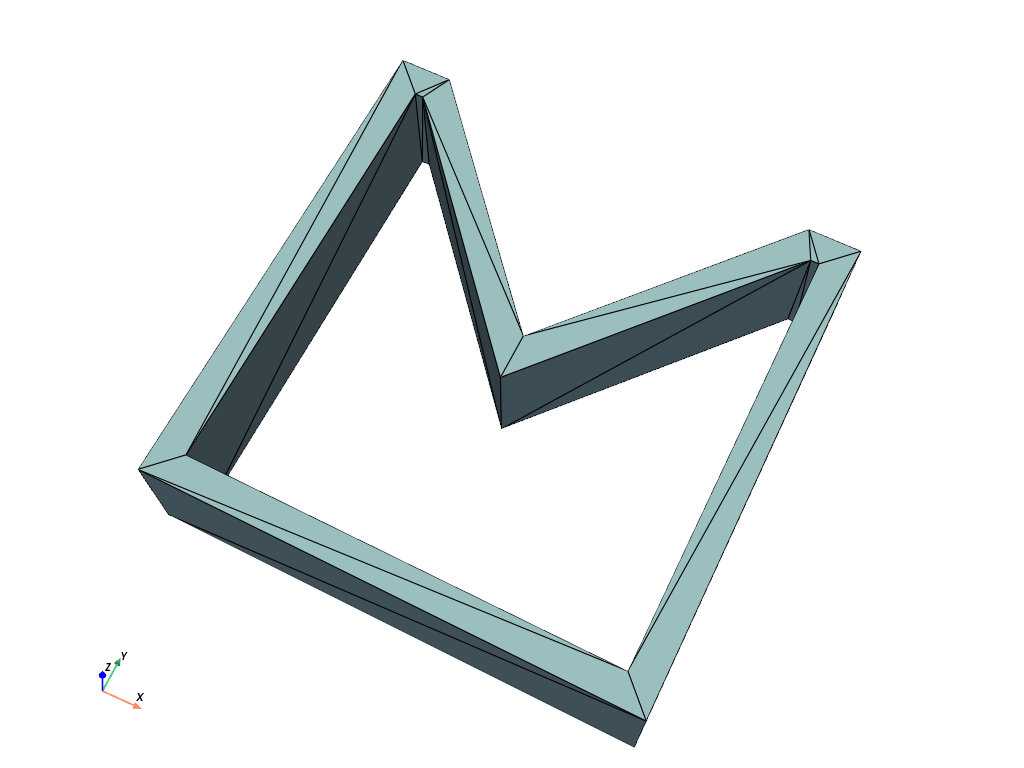

In [22]:
# display stl
mesh = pv.read(OUTPUT / f"{OUTPUT_NAME}.stl")
#mesh.plot(cpos='xy')
mesh.plot(cpos=[1, -2, 5], show_edges=True)

In [23]:
# load saved points:
pd.read_csv(OUTPUT / f"{OUTPUT_NAME}.csv")

,x,y
0,0.0,0.0
1,0.0,150.0
2,10.0,150.0
3,75.0,75.0
4,140.0,150.0
5,150.0,150.0
6,150.0,0.0


## 2. Create gcode from points

In [24]:
# define gcode parameters
#params[""]=...
params["layer_num"] = 4
params["layer_height"] = 10 #mm
params["layer_width"] = params["layer_thickness"]
params["offset_from_origin"] = [0, 0] # Offset from origin in mm
params["unit"] = "mm"    # Unit of the geometry
params["standard"] = "ConcretePrinter"   # Standard of the printer firmware
params["coordinate_system"] = "absolute" # Coordinate system of the printer firmware
params["nozzle_diameter"] = 0.4  # Diameter of the nozzle in mm
params["kappa"] = 1 # Parameter for the calculation of the extrusion width
params["tool_number"] = 0 # Tool number of the extruder. Expected to be an integer
params["feedrate"] = 1800 # Feedrate of the extruder in mm/min. Expected to be an integer

gcd = GcodeFromPoints(**params)
gcd.create(OUTPUT / f"{OUTPUT_NAME}.csv", OUTPUT / f"{OUTPUT_NAME}.gcode")

In [25]:
# output:
[f for f in OUTPUT.iterdir() if f.is_file()]

[PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.h5'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.csv'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.vtk'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.stl'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.msh'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.gcode'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.xdmf'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.stp')]

In [29]:
with open(OUTPUT / f"{OUTPUT_NAME}.gcode") as f:
    lines = [line for line in f]
print("".join(lines))

; Timestamp: 2024-02-02 12:07:06.229078
; Length: 151.0
; Width: 151.0
; Height: 40
; Layer height: 10
; Layer number: 4
; Line width: 1
; Tool number: 0
; Feed rate: 1800
; Kappa: 1
; Standard: ConcretePrinter
; Coordinate system: absolute
; Unit: mm
; Nozzle diameter: 0.4
; Material consumption(L): 26.739773296511686
; Original point: (0,0)
G90
M82
M106 S0
M104 S0
T0
G1 Z10 F1800
G92 E0
G1 X0.0 Y0.0 E0 F1800
G1 X0.0 Y150.0 E11936.6207 F1800
G1 X10.0 Y150.0 E12732.3954 F1800
G1 X75.0 Y75.0 E20630.2339 F1800
G1 X140.0 Y150.0 E28528.0724 F1800
G1 X150.0 Y150.0 E29323.8471 F1800
G1 X150.0 Y0.0 E41260.4678 F1800
G1 X0.0 Y0.0 E53197.0885 F1800
G1 Z20 F1800
G92 E0
G1 X0.0 Y0.0 E0 F1800
G1 X0.0 Y150.0 E11936.6207 F1800
G1 X10.0 Y150.0 E12732.3954 F1800
G1 X75.0 Y75.0 E20630.2339 F1800
G1 X140.0 Y150.0 E28528.0724 F1800
G1 X150.0 Y150.0 E29323.8471 F1800
G1 X150.0 Y0.0 E41260.4678 F1800
G1 X0.0 Y0.0 E53197.0885 F1800
G1 Z30 F1800
G92 E0
G1 X0.0 Y0.0 E0 F1800
G1 X0.0 Y150.0 E11936.6207 F1800
G

## 3. Create mesh from design

In [9]:
# define mesh parameters
params["mesh_size_factor"] = 1
params["number_of_layers"] =  4

meshing = MeshingGmsh(**params)
meshing.create(OUTPUT / f"{OUTPUT_NAME}.stp",OUTPUT / f"{OUTPUT_NAME}.xdmf",OUTPUT / f"{OUTPUT_NAME}.vtk")

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 10%] Meshing curve 3 (Line)
Info    : [ 10%] Meshing curve 4 (Line)
Info    : [ 10%] Meshing curve 5 (Line)
Info    : [ 10%] Meshing curve 6 (Line)
Info    : [ 10%] Meshing curve 7 (Line)
Info    : [ 10%] Meshing curve 8 (Line)
Info    : [ 10%] Meshing curve 9 (Line)
Info    : [ 10%] Meshing curve 10 (Line)
Info    : [ 10%] Meshing curve 11 (Line)
Info    : [ 10%] Meshing curve 12 (Line)
Info    : [ 10%] Meshing curve 13 (Line)
Info    : [ 20%] Meshing curve 14 (Line)
Info    : [ 20%] Meshing curve 15 (Line)
Info    : [ 20%] Meshing curve 16 (Line)
Info    : [ 20%] Meshing curve 17 (Line)
Info    : [ 20%] Meshing curve 18 (Line)
Info    : [ 20%] Meshing curve 19 (Line)
Info    : [ 20%] Meshing curve 20 (Line)
Info    : [ 20%] Meshing curve 21 (Line)
Info    : [ 20%] Meshing curve 22 (Line)
Info    : [ 20%] Meshing curve 23 (Line)
Info    : [ 20%] Meshing curve 24 (Line)
I

In [5]:
# output:
[f for f in OUTPUT.iterdir() if f.is_file()]

[PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.h5'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.csv'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.vtk'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.stl'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.msh'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.xdmf'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.stp')]

2024-02-02 11:36:26,271 - py.warnings - WARNING - /home/araderma/miniconda3/envs/amworkflow/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(



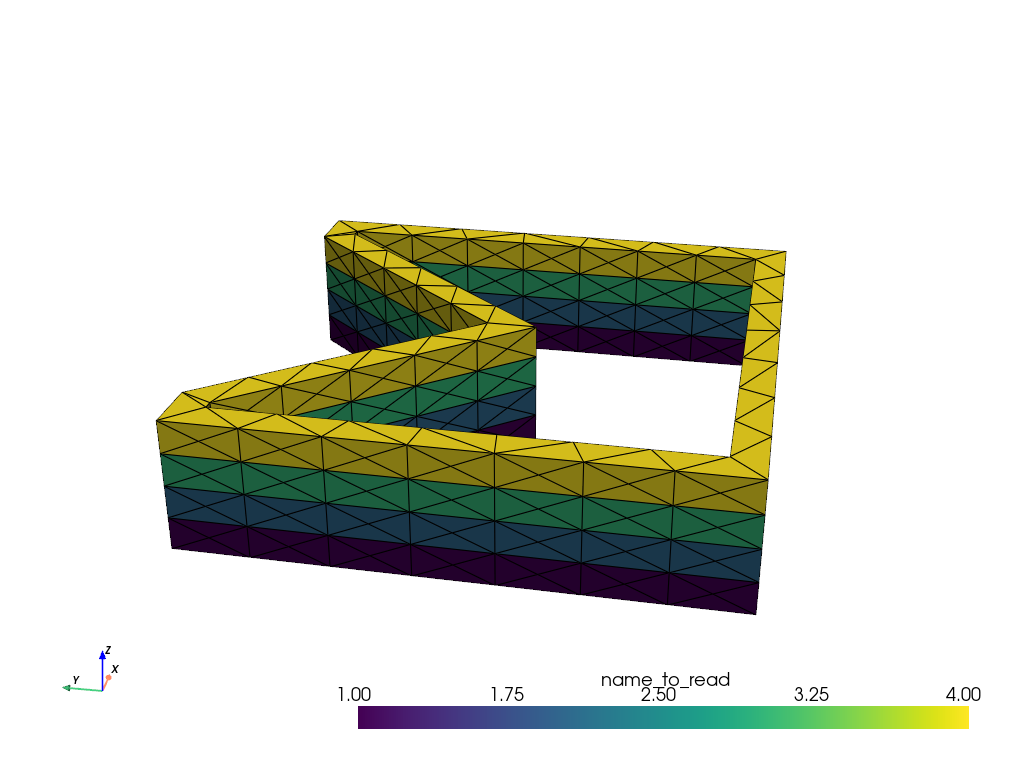

In [6]:
# display xdmf
mesh = pv.read(OUTPUT / f"{OUTPUT_NAME}.xdmf")
#mesh.plot(cpos='xz', show_edges=True)
mesh.plot(cpos=[-10, -2, 5], show_edges=True)

## 4. Run simulation

In [34]:
# define mesh parameters
params_sim_structure = {
    "mesh_unit": "mm" * ureg(""), 
    "dim": 3 * ureg(""),
    "degree": 2 * ureg(""),
    "q_degree": 2 * ureg(""),
    "bc_setting": "fixed_y_bottom" * ureg(""),
    "rho": 2400 * ureg("kg/m^3"),
    "g": 9.81 * ureg("m/s^2"),
    "E": 33000 * ureg("MPa"),
    "nu": 0.2 * ureg(""),
    "top_displacement": -5.0 * ureg("mm"),
    "material_type": "linear" * ureg(""),
    "experiment_type": "structure" * ureg(""),
}

simulation = SimulationFenicsXConcrete(params_sim_structure)
simulation.run(OUTPUT / f"{OUTPUT_NAME}.xdmf", OUTPUT / f"{OUTPUT_NAME}_sim_structure.xdmf")

fix at y= -0.005
check points at y_min [[-0.005      -0.005       0.        ]
 [-0.005      -0.005       0.01      ]
 [ 0.00642857 -0.005       0.005     ]
 [-0.005      -0.005       0.02      ]
 [ 0.00642857 -0.005       0.015     ]
 [ 0.01785714 -0.005       0.        ]
 [ 0.01785714 -0.005       0.01      ]
 [-0.005      -0.005       0.03      ]
 [ 0.00642857 -0.005       0.025     ]
 [ 0.01785714 -0.005       0.02      ]
 [-0.005      -0.005       0.04      ]
 [ 0.00642857 -0.005       0.035     ]
 [ 0.01785714 -0.005       0.03      ]
 [ 0.01785714 -0.005       0.04      ]
 [ 0.02928571 -0.005       0.005     ]
 [ 0.04071429 -0.005       0.        ]
 [ 0.04071429 -0.005       0.01      ]
 [ 0.02928571 -0.005       0.015     ]
 [ 0.02928571 -0.005       0.025     ]
 [ 0.04071429 -0.005       0.02      ]
 [ 0.04071429 -0.005       0.03      ]
 [ 0.02928571 -0.005       0.035     ]
 [ 0.04071429 -0.005       0.04      ]
 [ 0.05214286 -0.005       0.005     ]
 [ 0.06357143 -0.005     

In [35]:
# output:
[f for f in OUTPUT.iterdir() if f.is_file()]

[PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy_sim_structure.xdmf'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.h5'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.csv'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.vtk'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.stl'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.msh'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.gcode'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.xdmf'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy_sim_structure.h5'),
 PosixPath('/home/araderma/Documents/03_codes/amworkflow/examples/toy/output_notebook/toy.stp')]

2024-02-02 12:53:10,102 - py.warnings - WARNING - /home/araderma/miniconda3/envs/amworkflow/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(



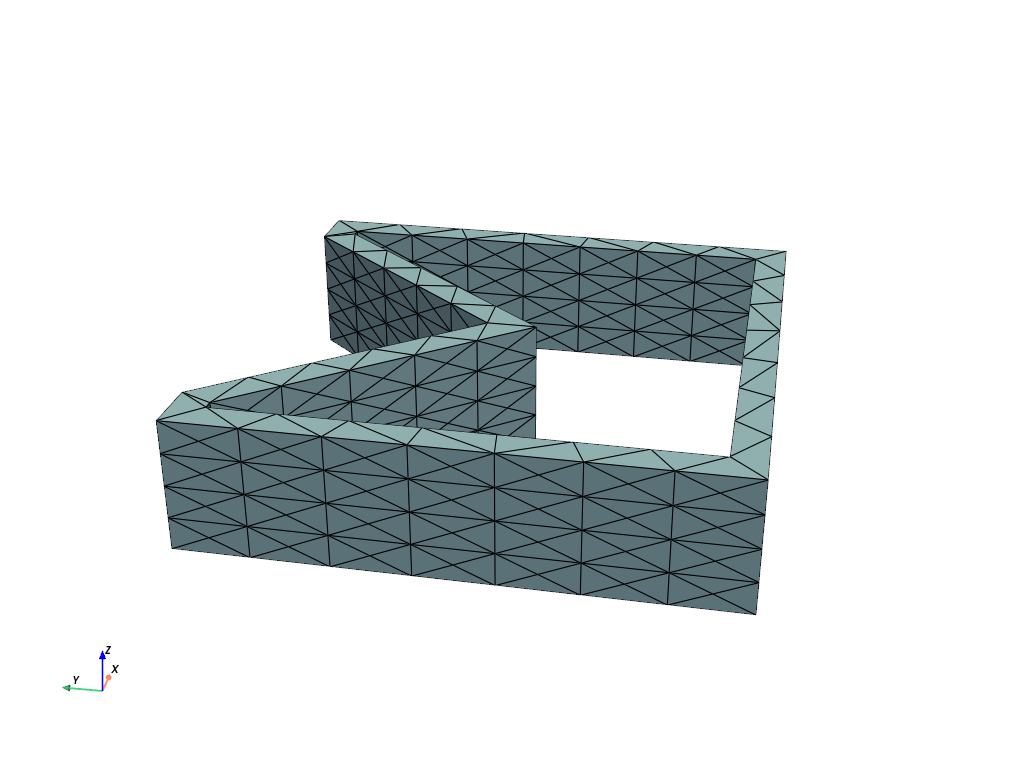

In [36]:
# display xdmf
mesh = pv.read(OUTPUT / f"{OUTPUT_NAME}_sim_structure.xdmf")
#mesh.plot(cpos='xz', show_edges=True)
mesh.plot(cpos=[-10, -2, 5], show_edges=True)